In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression,LassoCV,RidgeCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , mean_absolute_error , mean_squared_error , r2_score , f1_score , precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from pandas.plotting import scatter_matrix
import joblib
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

2025-05-11 14:30:57.145474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746973857.375586      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746973857.443438      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,2.240150e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.432227e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.386744e-16,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False)

Series([], dtype: int64)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [9]:
df.shape

(283726, 31)

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
labels=["Genuine","Fraud"]
fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

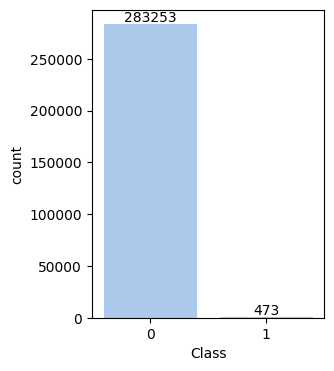

In [12]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [13]:
print('Genuine:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Genuine: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


In [14]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

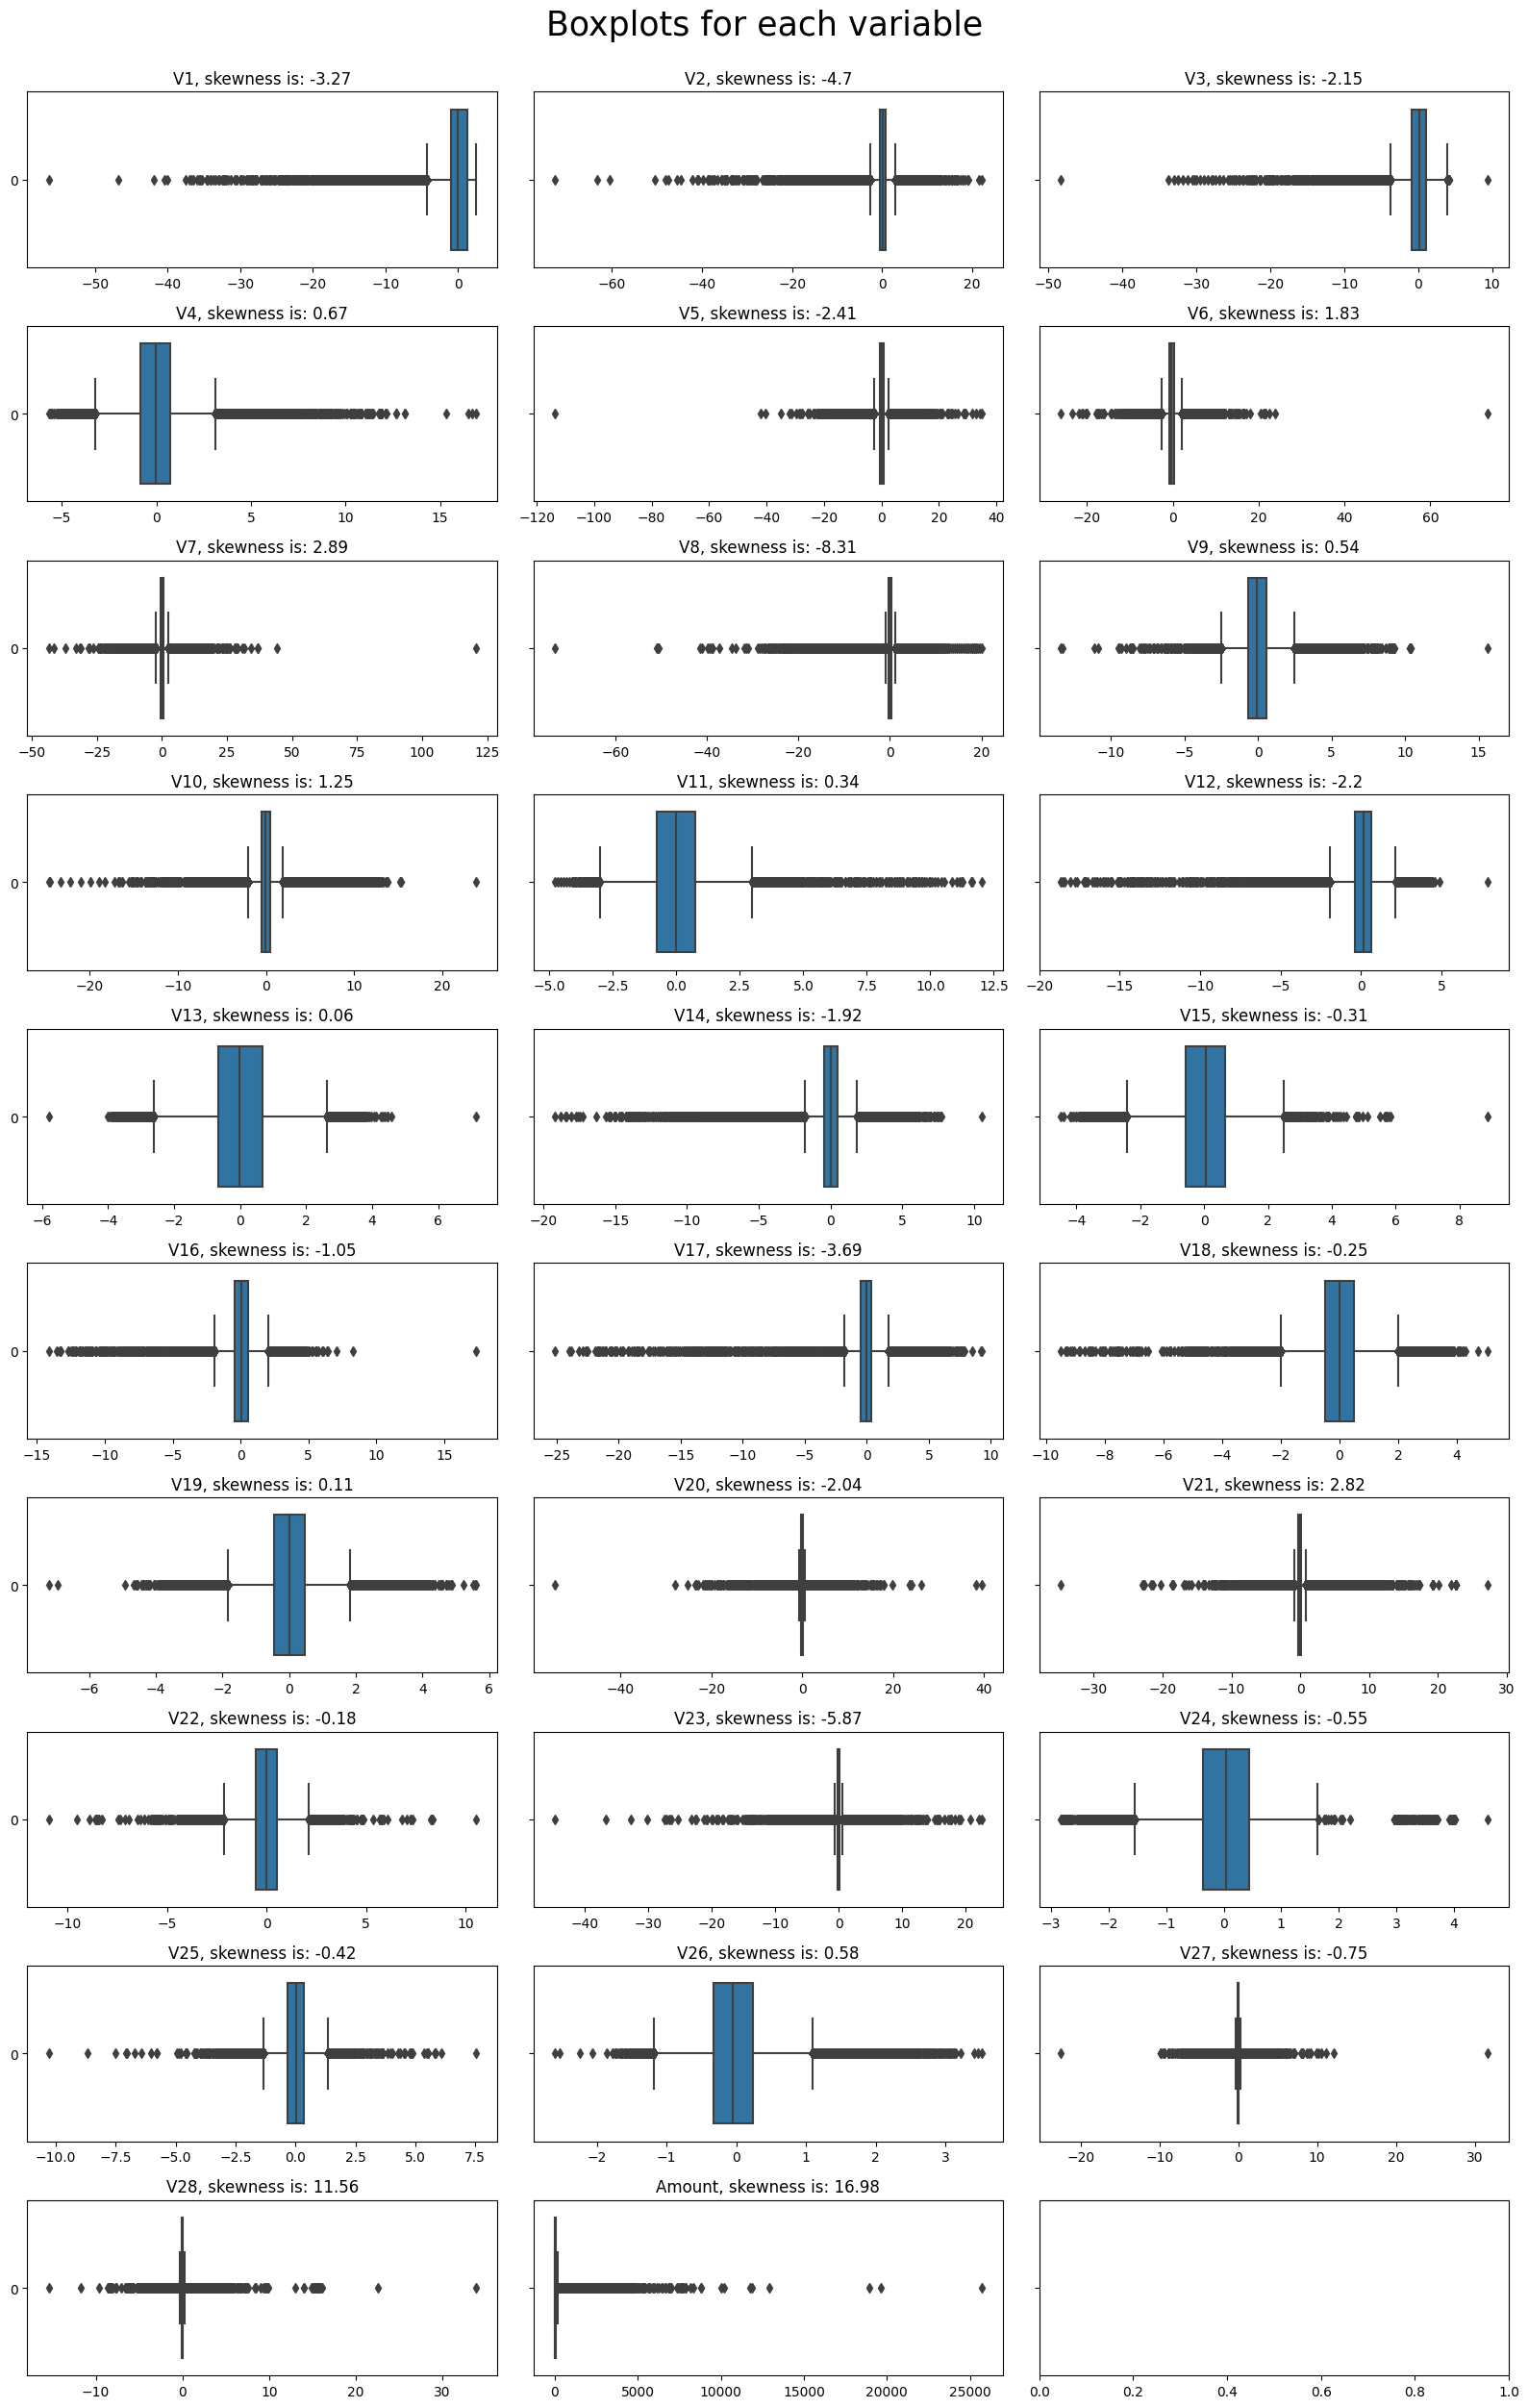

In [15]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [16]:

def IQR_method (df,n,features):
    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column)
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    return multiple_outliers

In [17]:
Outliers_IQR = IQR_method(df,1,numeric_columns)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31685


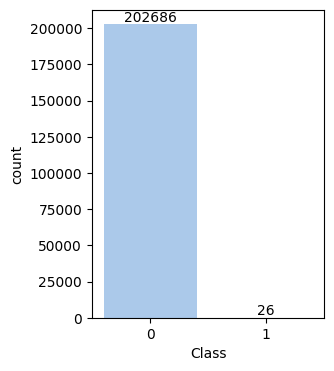

In [18]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

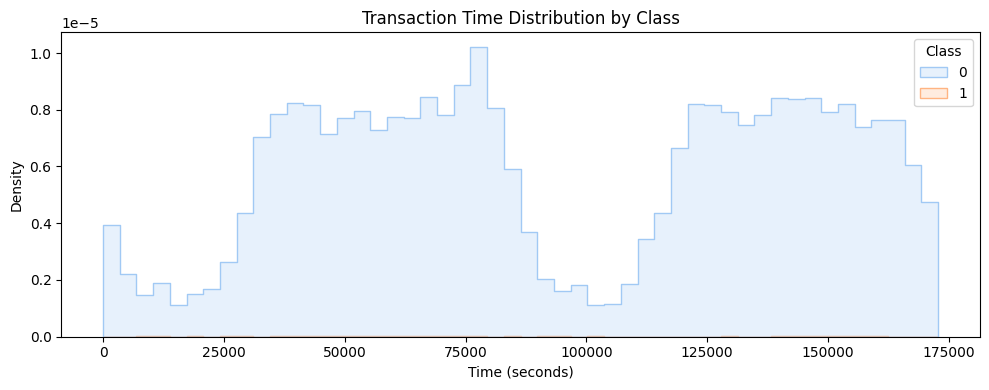

In [19]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Time', hue='Class', bins=50, palette='pastel', element='step', stat='density')
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



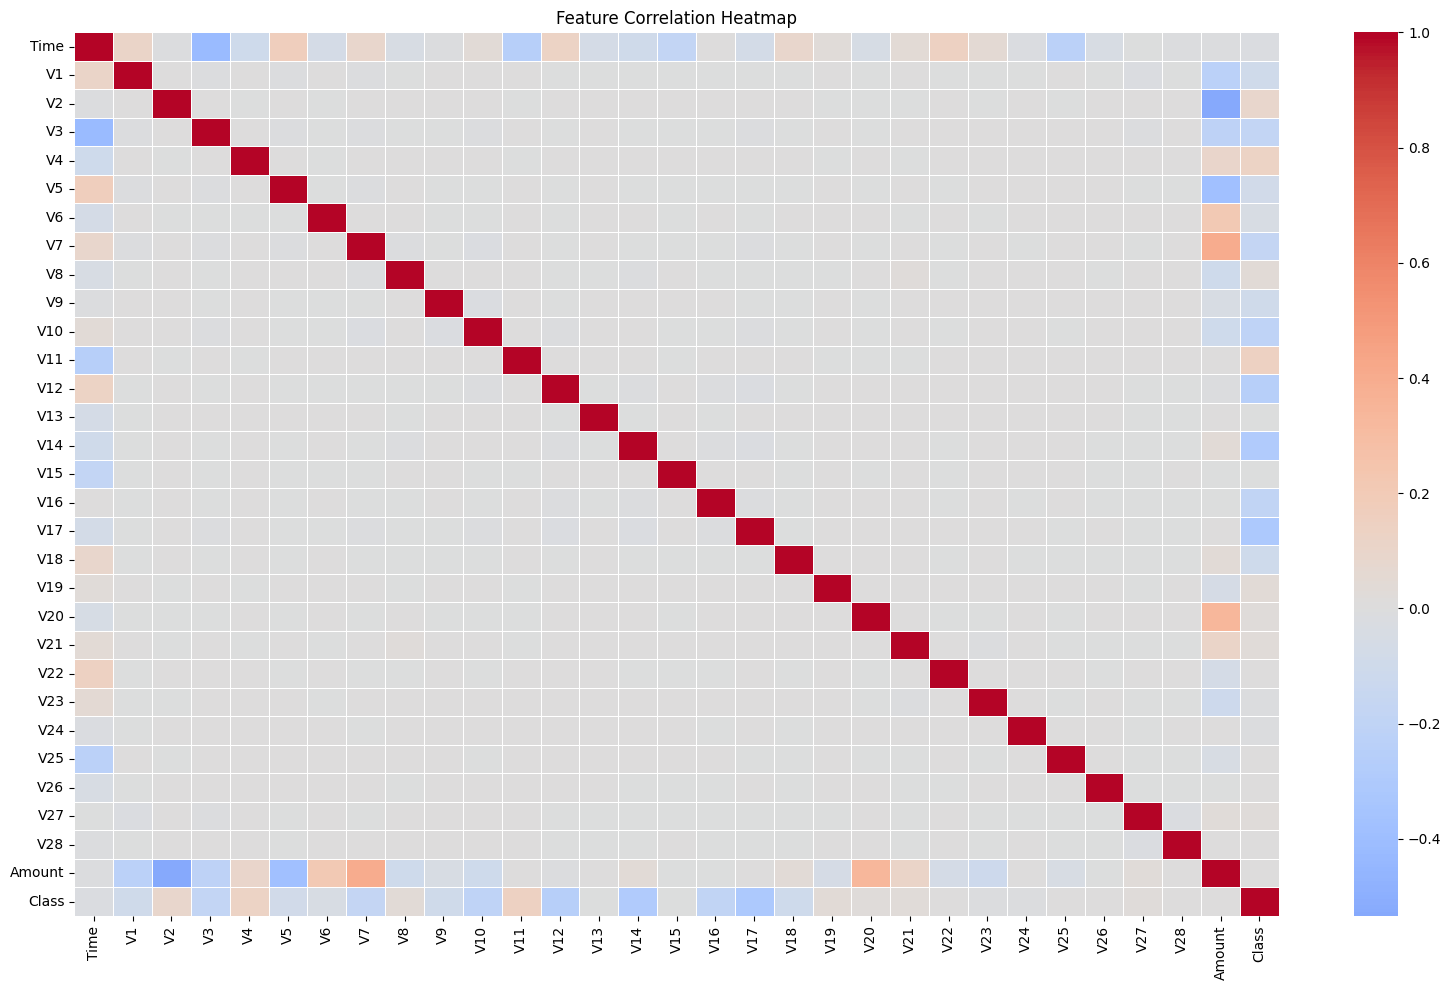

In [20]:
plt.figure(figsize=(16, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

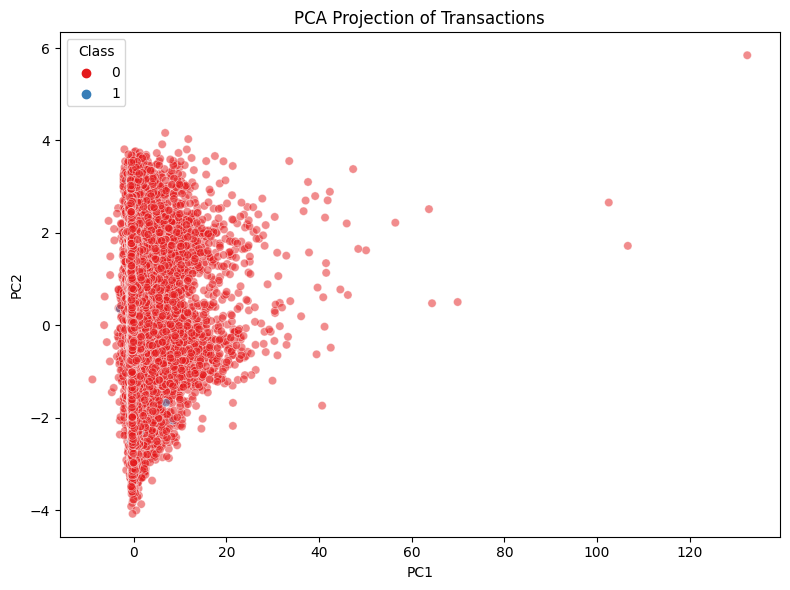

In [21]:
features = df.drop(columns=['Class'])
scaled_features = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

# Create PCA DataFrame
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Class'] = df['Class'].values

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', alpha=0.5, palette='Set1')
plt.title('PCA Projection of Transactions')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/

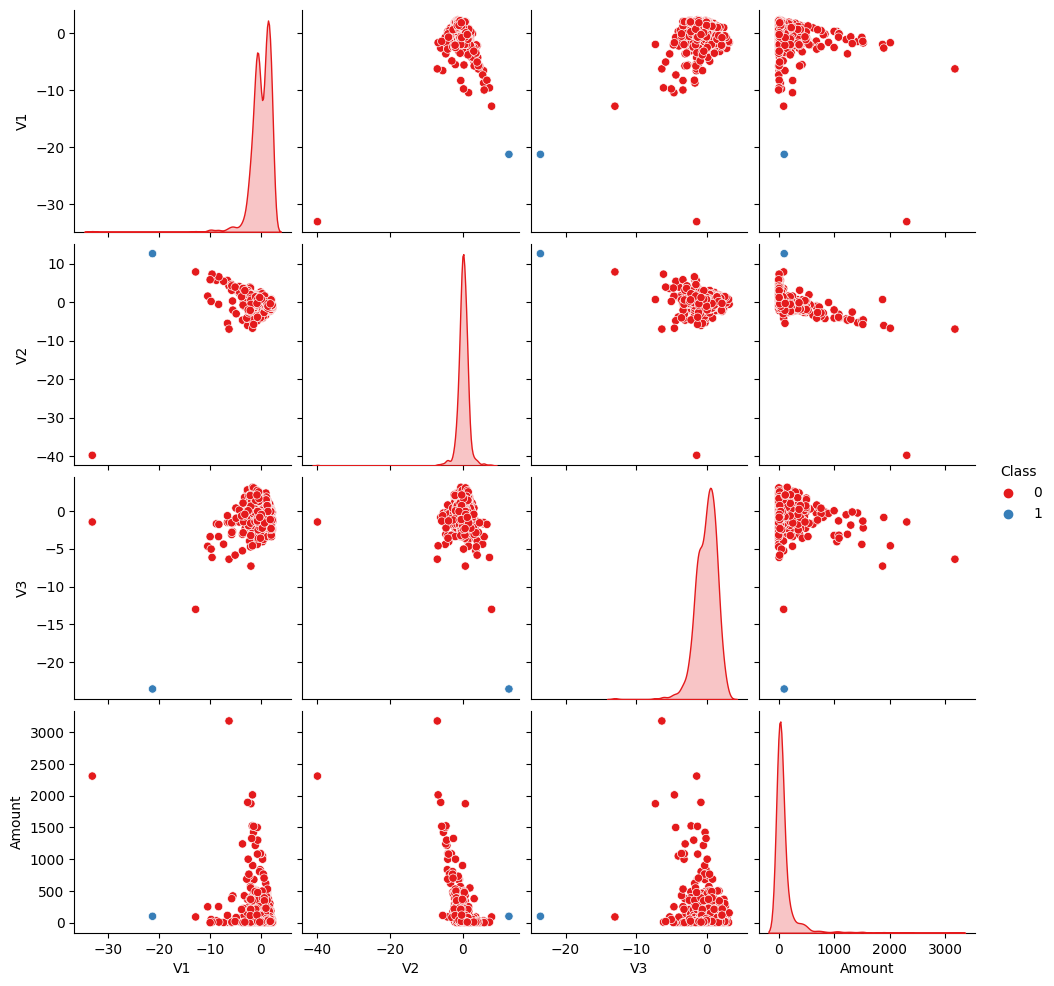

In [22]:
sample_df = df.sample(1000, random_state=1)
sns.pairplot(sample_df, vars=['V1', 'V2', 'V3', 'Amount'], hue='Class', palette='Set1')
plt.show()

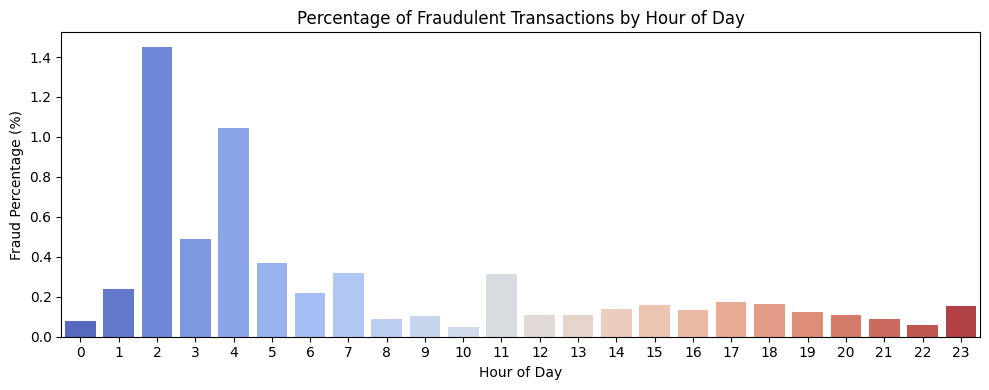

In [23]:
df['Hour'] = (df['Time'] / 3600).astype(int) % 24  # Convert seconds to hour of day

hourly_fraud = df.groupby('Hour')['Class'].mean() * 100  # % of fraud

plt.figure(figsize=(10, 4))
sns.barplot(x=hourly_fraud.index, y=hourly_fraud.values, palette='coolwarm')
plt.title('Percentage of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Percentage (%)')
plt.tight_layout()
plt.show()

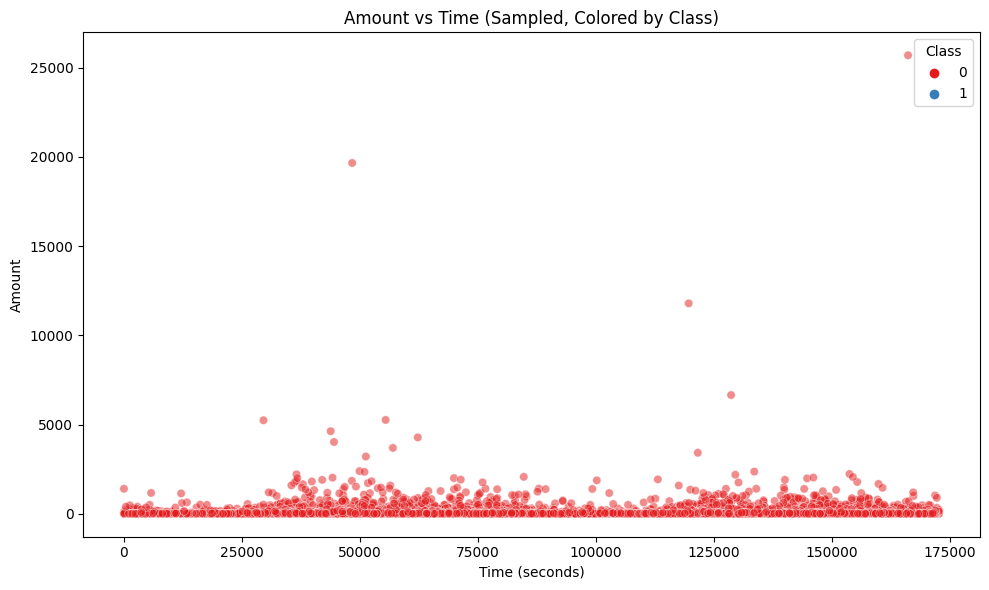

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000), x='Time', y='Amount', hue='Class', alpha=0.5, palette='Set1')
plt.title('Amount vs Time (Sampled, Colored by Class)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

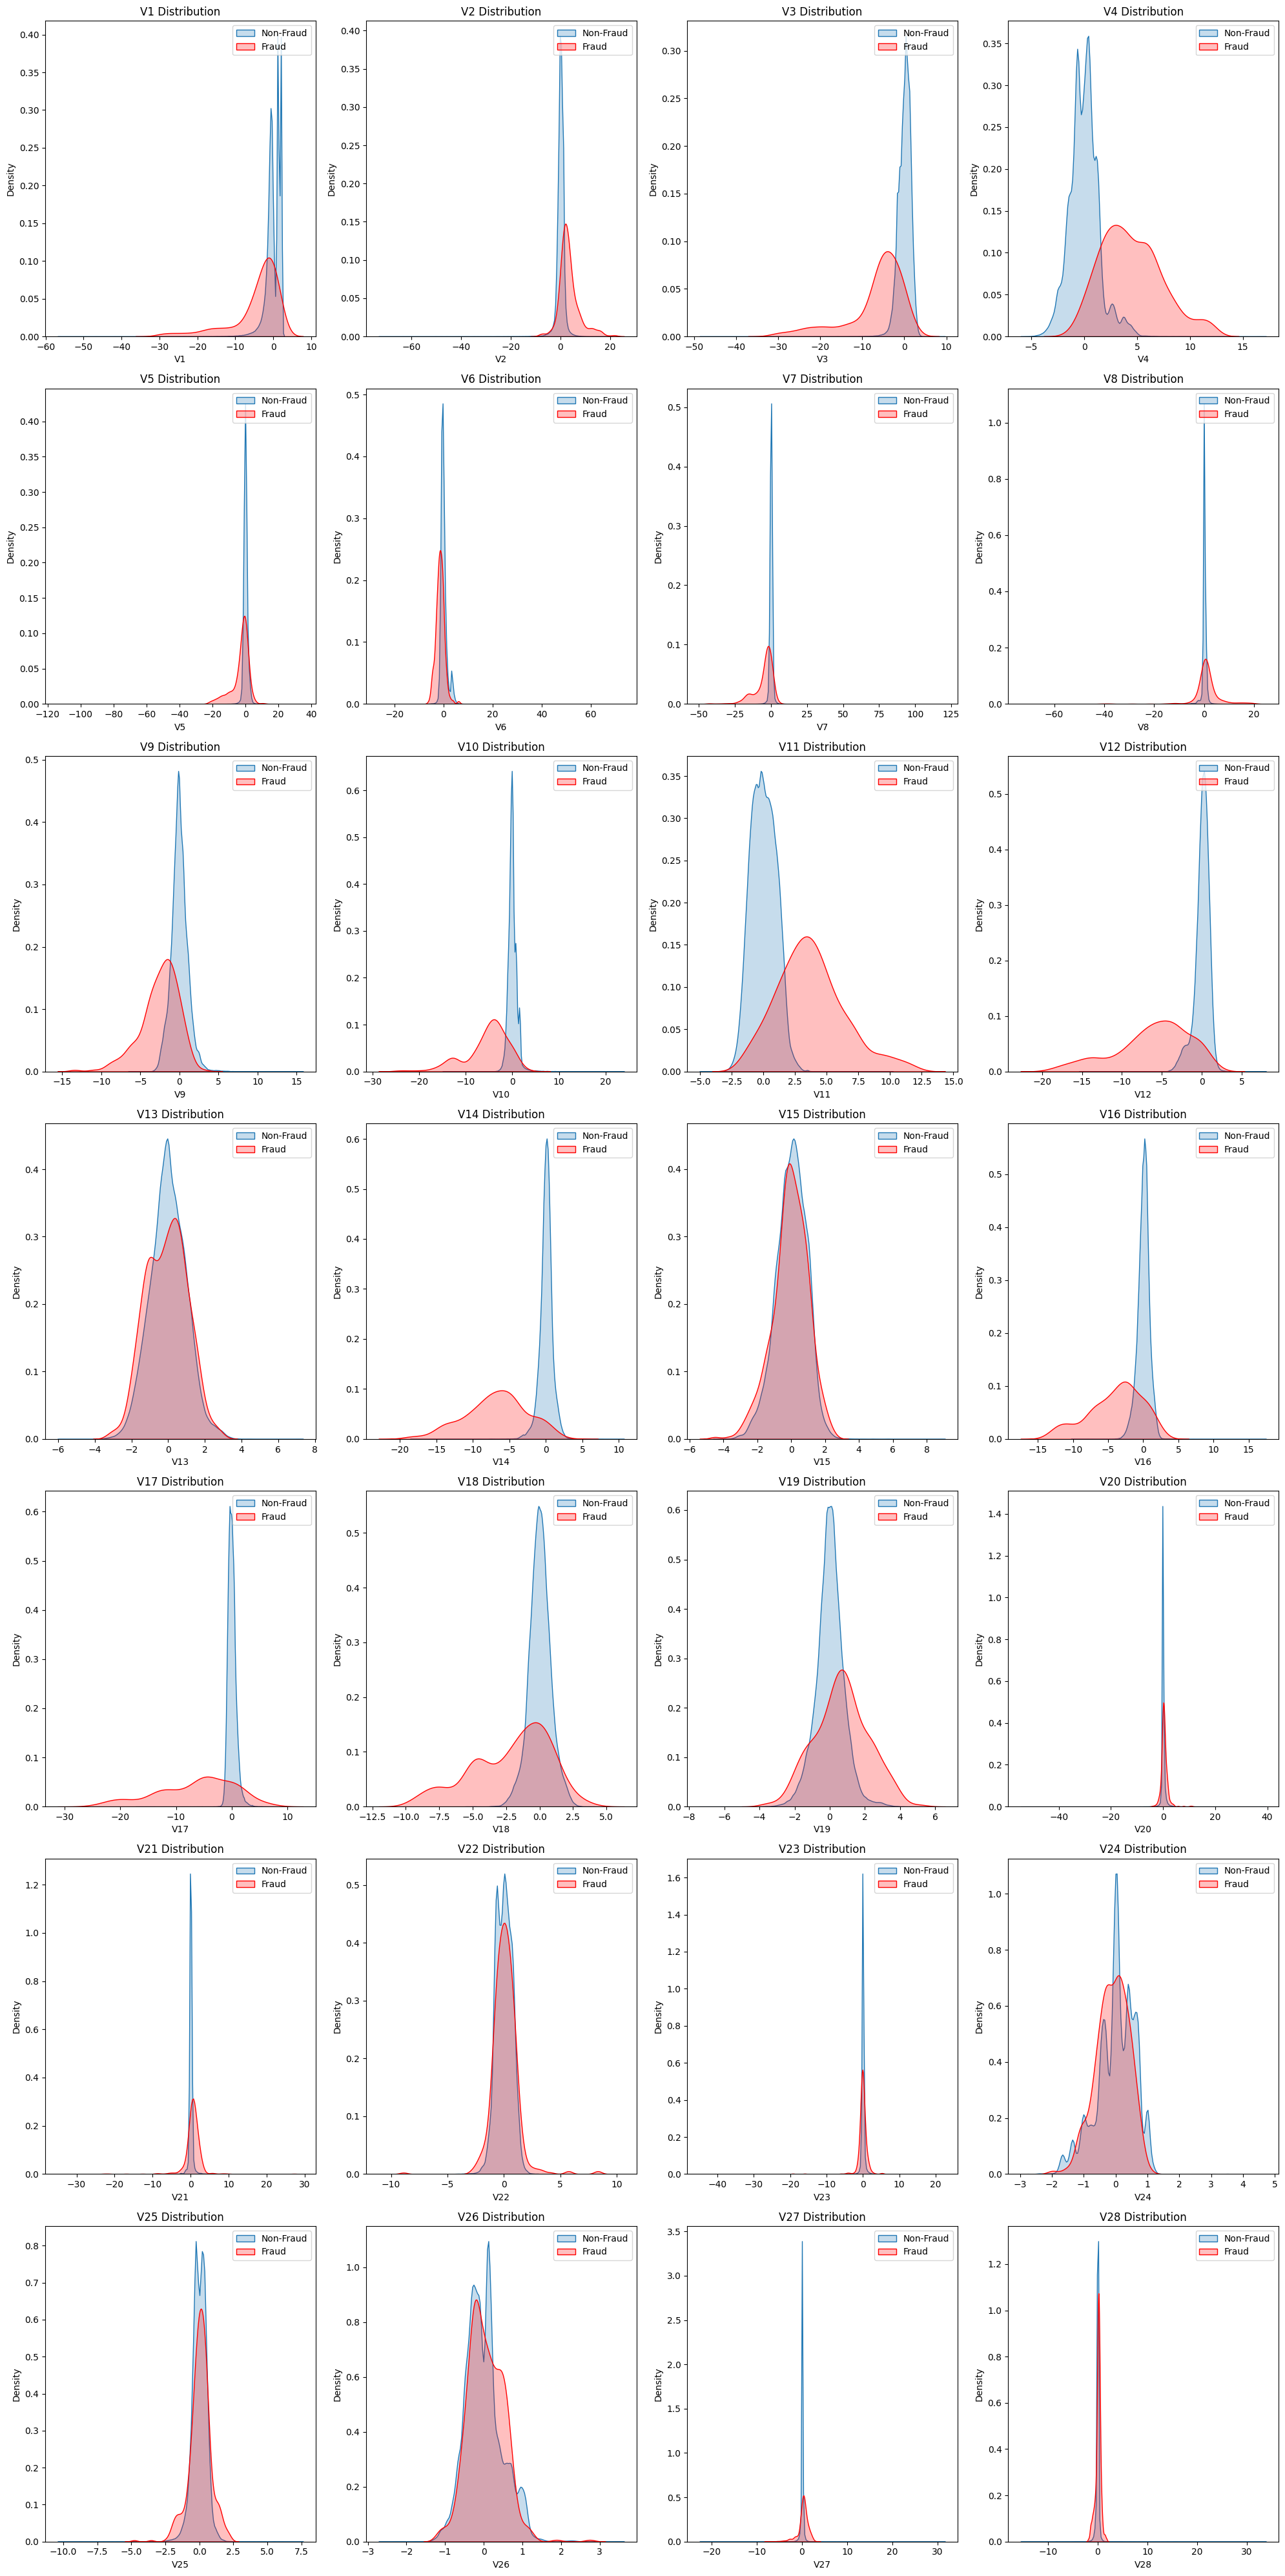

In [25]:
features = [f'V{i}' for i in range(1, 29)]
n_cols = 4
n_rows = int(np.ceil(len(features) / n_cols))

plt.figure(figsize=(20, 40))
for idx, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', fill=True)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', fill=True, color='r')
    plt.title(f'{feature} Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

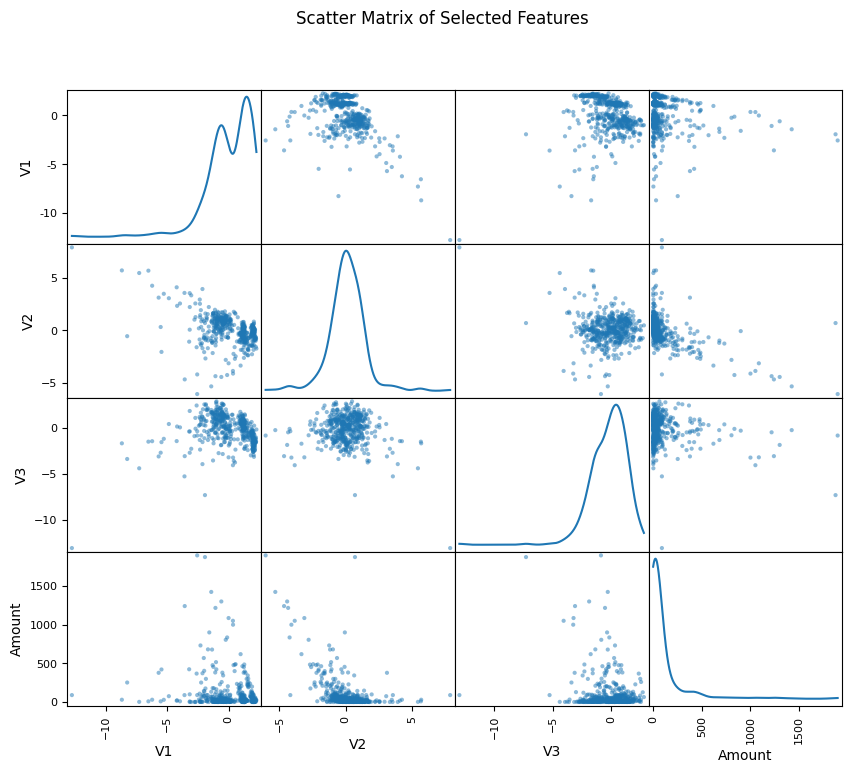

In [26]:
df_sample = df.sample(500, random_state=1)
features_to_plot = ['V1', 'V2', 'V3', 'Amount']
scatter_matrix(df_sample[features_to_plot], figsize=(10, 8), diagonal='kde')
plt.suptitle('Scatter Matrix of Selected Features')
plt.show()

In [27]:
df.drop(['Time','Hour'], axis=1, inplace=True)

In [28]:
x = df.drop('Class', axis=1)
y = df['Class']

In [29]:
!pip install --force-reinstall scikit-learn==1.3.2 imbalanced-learn==0.11.0
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)
x= pd.DataFrame(x_smote)
y= pd.DataFrame(y_smote)

  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e65a4636700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <functio

<Axes: xlabel='Class'>

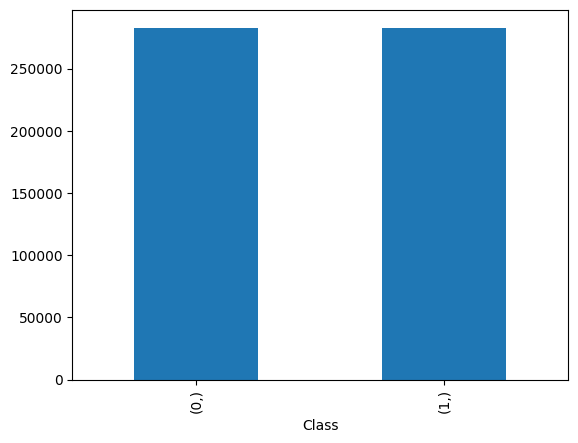

In [30]:
y.value_counts().plot.bar()

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_scaler_minMax = my_scaler.fit_transform(x_train)
X_scaler_minMax_test = my_scaler.transform(x_test)
joblib.dump(my_scaler,"scaler.save")

['scaler.save']

In [32]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [33]:
print("x_train = ",x_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",x_test.shape ," y_test  = ", y_test.shape)

x_train =  (453204, 29)  y_train =  (453204, 1)
X_test  =  (113302, 29)  y_test  =  (113302, 1)


In [34]:
!pip install xgboost
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
models ={
    'LogisticRegression' : LogisticRegression(),
    'LassoCV' : LassoCV(),
    'RidgeCV' : RidgeCV(),
    #'SVC' : SVC(C=1, gamma=0.5, kernel='rbf'),
    'GaussianNB' : GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier( max_depth=5,random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=20,  max_depth=5,random_state=42),
    #'KNN Classifier': KNeighborsClassifier(n_neighbors=3),
    "GradientBoostingRegressor":GradientBoostingRegressor(n_estimators=7,learning_rate=0.1,max_depth=3,subsample=0.8,random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=7,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

In [35]:
accuracy=[]
for model_name , model in models.items():
    model.fit(x_train,y_train)
    MAE_Train = accuracy_score(y_train,model.predict(x_train).round())
    MAE_Test  =  accuracy_score(y_test,model.predict(x_test).round())

    MSE_Train = precision_score(y_train,model.predict(x_train).round(), average='weighted')
    MSE_Test  =  precision_score(y_test,model.predict(x_test).round(), average='weighted')

    RMSE_Train = recall_score(y_train,model.predict(x_train).round(), average='weighted')
    RMSE_Test  =  recall_score(y_test,model.predict(x_test).round(), average='weighted')

    R_Train = f1_score(y_train,model.predict(x_train).round(), average='weighted')
    R_Test  =  f1_score(y_test,model.predict(x_test).round(), average='weighted')

    accuracy.append([MAE_Train,MSE_Train,RMSE_Train,R_Train,MAE_Test,MSE_Test,RMSE_Test,R_Test])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/skle

In [36]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train","Acc_Test","pre_Test","Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,pre_Test,Rec_Test,F1_Test
LogisticRegression,0.957511,0.958523,0.957511,0.957487,0.957344,0.958372,0.957344,0.957324
LassoCV,0.909101,0.928930,0.909101,0.913647,0.908925,0.929369,0.908925,0.913673
RidgeCV,0.916345,0.930939,0.916345,0.919408,0.916003,0.931056,0.916003,0.919198
GaussianNB,0.916351,0.921987,0.916351,0.916066,0.915677,0.921393,0.915677,0.915408
Decision Tree Classifier,0.959939,0.959954,0.959939,0.959938,0.959471,0.959495,0.959471,0.959471
Random Forest Classifier,0.951459,0.954691,0.951459,0.951371,0.951466,0.954730,0.951466,0.951386
GradientBoostingRegressor,0.951477,0.953496,0.951477,0.951421,0.951254,0.953300,0.951254,0.951205
XGBoost,0.965585,0.966361,0.965585,0.965570,0.965226,0.966032,0.965226,0.965213


In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
joblib.dump(model,"model.save")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



['model.save']

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Results for LogisticRegression:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion Matrix:
[[55384  1079]
 [ 3754 53085]]


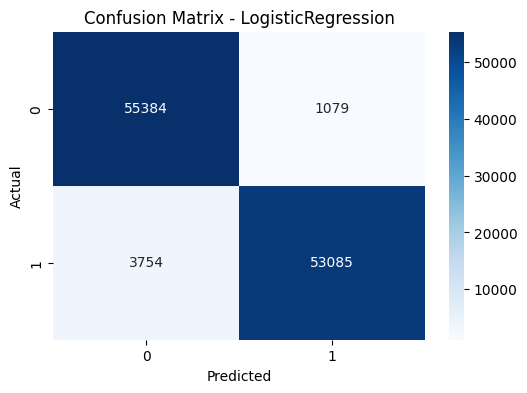


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56463
           1       0.98      0.93      0.96     56839

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302


Results for LassoCV:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Confusion Matrix:
[[55905   558]
 [ 8357 48482]]


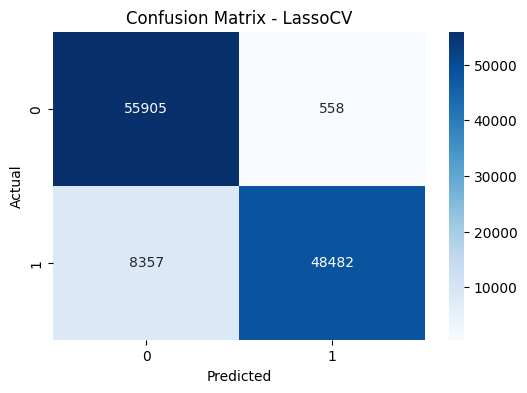


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     56463
           1       0.99      0.85      0.92     56839

    accuracy                           0.92    113302
   macro avg       0.93      0.92      0.92    113302
weighted avg       0.93      0.92      0.92    113302


Results for RidgeCV:
Confusion Matrix:
[[55740   723]
 [ 7863 48976]]


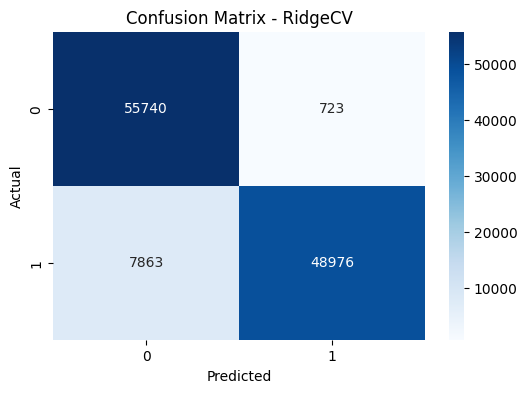


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     56463
           1       0.99      0.86      0.92     56839

    accuracy                           0.92    113302
   macro avg       0.93      0.92      0.92    113302
weighted avg       0.93      0.92      0.92    113302


Results for GaussianNB:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Confusion Matrix:
[[54977  1486]
 [ 8068 48771]]


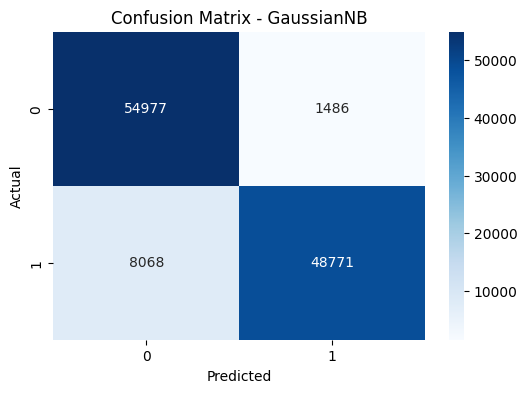


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56463
           1       0.97      0.86      0.91     56839

    accuracy                           0.92    113302
   macro avg       0.92      0.92      0.92    113302
weighted avg       0.92      0.92      0.92    113302


Results for Decision Tree Classifier:
Confusion Matrix:
[[54368  2095]
 [ 2497 54342]]


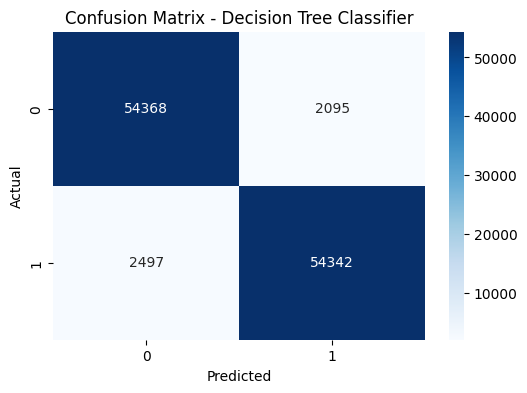


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     56463
           1       0.96      0.96      0.96     56839

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302


Results for Random Forest Classifier:


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Confusion Matrix:
[[56109   354]
 [ 5145 51694]]


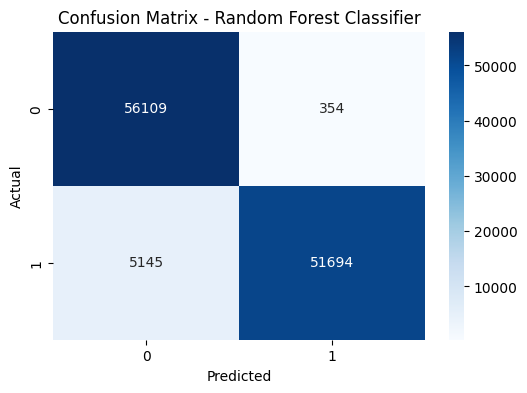


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56463
           1       0.99      0.91      0.95     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302


Results for GradientBoostingRegressor:


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Confusion Matrix:
[[55600   863]
 [ 4660 52179]]


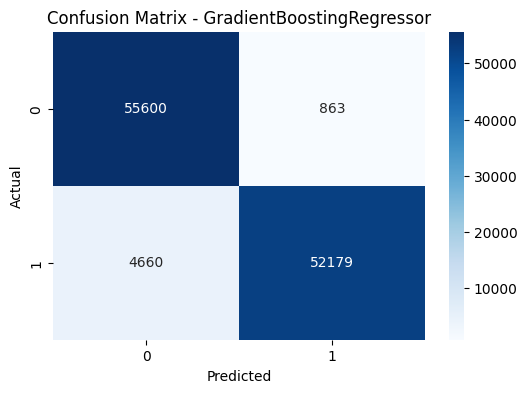


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56463
           1       0.98      0.92      0.95     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302


Results for XGBoost:
Confusion Matrix:
[[55668   795]
 [ 3145 53694]]


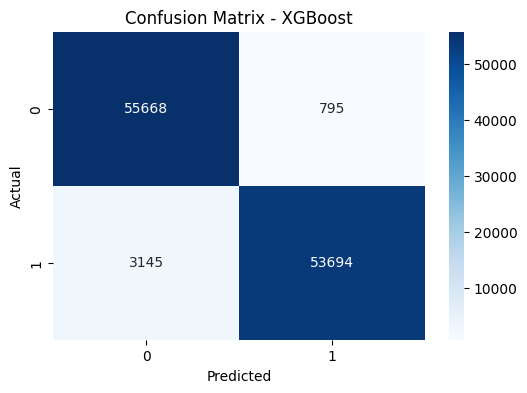


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56463
           1       0.99      0.94      0.96     56839

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



In [38]:
for name, model in models.items():
    print(f"\nResults for {name}:\n{'='*30}")

    model.fit(x_train, y_train)

    # Convert predictions to binary using a threshold (e.g., 0.5)
    y_test_pred = (model.predict(x_test) > 0.5).astype(int)

    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'],
                yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.show()
    plt.close()

    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['0', '1']))

In [39]:
from tensorflow.keras.layers import Dense, Dropout

model = keras.Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # <- Fixed this line

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

2025-05-11 14:37:25.742421: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Ensure x_train and y_train are NumPy arrays
history = model.fit(
    x_train.values,
    y_train.values.ravel(),  # flatten labels
    epochs=30,
    validation_split=0.2,
    class_weight={0: 1, 1: 20}  # Adjust for class imbalance
)


Epoch 1/30
11331/11331 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5939 - loss: 6.3580 - val_accuracy: 0.8697 - val_loss: 0.2774
Epoch 2/30
11331/11331 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9087 - loss: 0.3446 - val_accuracy: 0.9486 - val_loss: 0.1318
Epoch 3/30
11331/11331 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9406 - loss: 0.2412 - val_accuracy: 0.9315 - val_loss: 0.1802
Epoch 4/30
11331/11331 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9545 - loss: 0.1921 - val_accuracy: 0.9778 - val_loss: 0.0509
Epoch 5/30
11331/11331 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9598 - loss: 0.1814 - val_accuracy: 0.9823 - val_loss: 0.0452
Epoch 6/30
11331/11331 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9595 - loss: 0.1727 - val_accuracy: 0.9641 - val_loss: 0.0884
Epoch 7/30
11331/11331 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9638 - loss: 0.1551 - val_accuracy: 0.9805 - val_loss: 0.0553
Epoch 8/30
11331/11331 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 

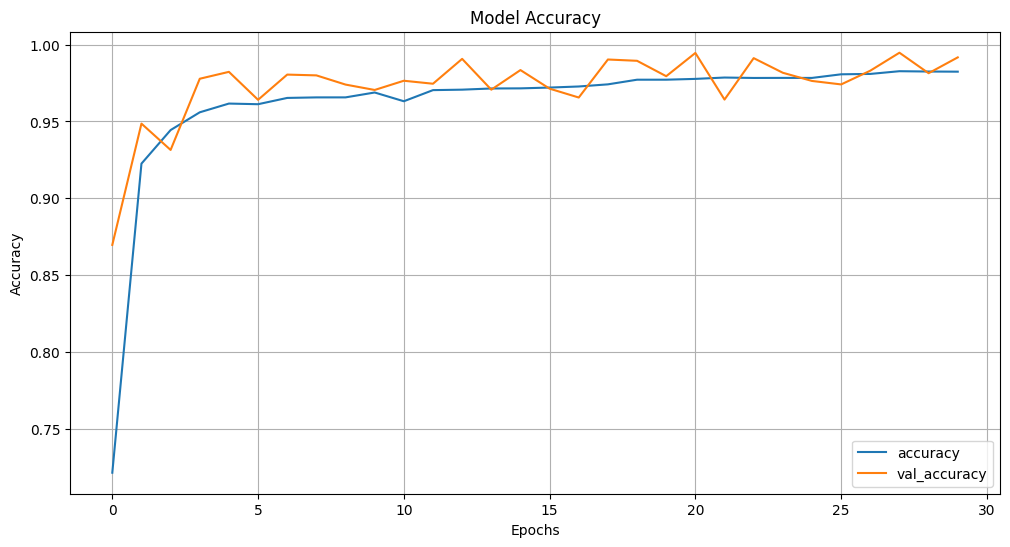

-----------------------------------------------------------------------
Test Loss       :  0.020483506843447685
Test Accuracy   :  0.9922243356704712


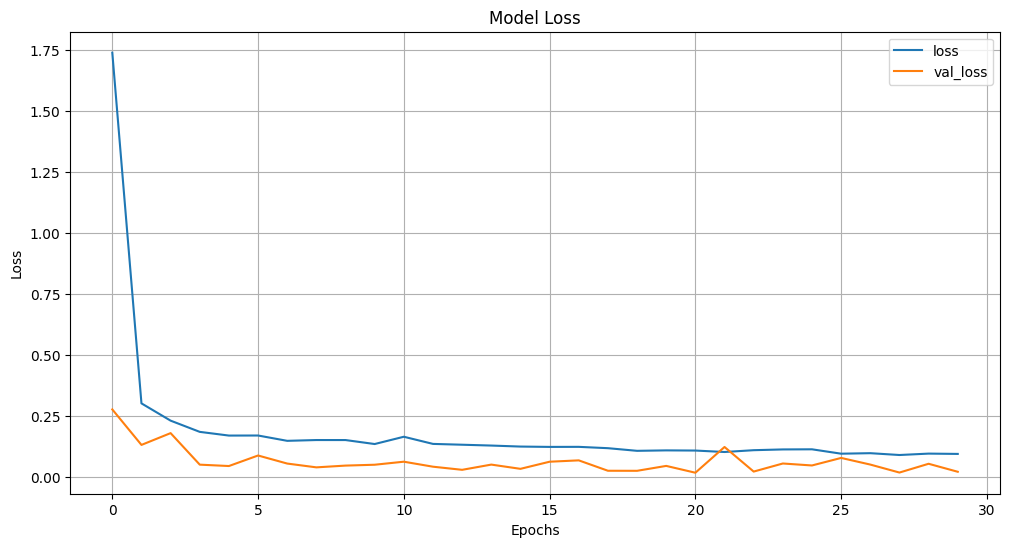

-----------------------------------------------------------------------
Validation Loss       :  0.020483506843447685
Validation Accuracy   :  0.9922243356704712


In [44]:
# Plot training and validation accuracy
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(12, 6))
plt.grid(True)
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

print("-----------------------------------------------------------------------")

# Evaluate the model (convert to NumPy arrays)
model_evaluate = model.evaluate(x_test.values, y_test.values.ravel(), verbose=0)

# Extract and print loss and accuracy
loss = model_evaluate[0]
accuracy = model_evaluate[1]

print("Test Loss       : ", loss)
print("Test Accuracy   : ", accuracy)

# Plot training and validation loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(12, 6))
plt.grid(True)
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

print("-----------------------------------------------------------------------")

# Reprint evaluation results for clarity
print("Validation Loss       : ", loss)
print("Validation Accuracy   : ", accuracy)

In [45]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

predicted = model.predict(x_test)
predicted_labels = (predicted > 0.5).astype(int)

# Model evaluation
print("precision_score    : ", precision_score(y_test, predicted_labels))
print("recall_score       : ", recall_score(y_test, predicted_labels))
print("f1_score           : ", f1_score(y_test, predicted_labels))

print("-----------------------------------------------------------------------")
df_data = pd.DataFrame({
    "Actual": y_test.values.ravel(),
    "Predicted": predicted_labels.flatten()
})
print(df_data.head(15))
print("-----------------------------------------------------------------------")


3541/3541 ━━━━━━━━━━━━━━━━━━━━ 3s 877us/step
precision_score    :  0.9847534564607229
recall_score       :  0.9999824064462781
f1_score           :  0.9923095053117662
-----------------------------------------------------------------------
    Actual  Predicted
0        1          1
1        0          0
2        0          0
3        1          1
4        0          0
5        1          1
6        1          1
7        1          1
8        0          0
9        1          1
10       0          0
11       1          1
12       0          0
13       1          1
14       1          1
-----------------------------------------------------------------------


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,predicted_labels))
print("-----------------------------------------------------------------------")
print(classification_report(y_test,predicted_labels))
print("-----------------------------------------------------------------------")

[[55583   880]
 [    1 56838]]
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56463
           1       0.98      1.00      0.99     56839

    accuracy                           0.99    113302
   macro avg       0.99      0.99      0.99    113302
weighted avg       0.99      0.99      0.99    113302

-----------------------------------------------------------------------


In [ ]:
import shutil
shutil.make_archive('results', 'zip', '.')